In [5]:
#%matplotlib ipympl

In [6]:
from model.mlp.mlp import *
from data.dataset import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
import torch

In [7]:
mlp = MLP(width=[2, 100, 100, 100, 1]);

learning_rate = 5e-4
optimizer = torch.optim.Adam(mlp.parameters(), lr = learning_rate, weight_decay=1e-5)

loss = torch.nn.MSELoss()
test_func = lambda x: torch.exp(torch.sin(torch.pi * x[:, 0]) + x[:, 1] ** 2 + torch.tan(x[:, 0]))
train_dataset = FunctionDataset(func=test_func, num_samples = 10000, range=[[-1, 1], [-1, 1]], noise_std=0).get_dataloader(batch_size=64)
test_dataset = FunctionDataset(func=test_func, num_samples = 10000, range=[[-1, 1], [-1, 1]], noise_std=0).get_dataloader(batch_size=64)

print(len(train_dataset.dataset))


10000


In [8]:
#optim = torch.optim.LBFGS(mlp.parameters(), lr = 1e-2, history_size=10, line_search_fn="strong_wolfe", tolerance_grad=1e-32, tolerance_change=1e-32)
mlp.train_model(train_loader=train_dataset, val_loader=test_dataset, optimizer=optimizer, loss_func=loss, epochs = 50, is_lbfgs=False)

train_loss: 0.0037861533670991683, val_loss: 0.00224549552517688: 100%|██████████| 50/50 [00:26<00:00,  1.90it/s]  


([5.194975267170341,
  1.2587944449512822,
  0.6172470351692977,
  0.360332160286463,
  0.2037797837880007,
  0.11623363876655983,
  0.06656734120978672,
  0.04202020495157143,
  0.025846556816724646,
  0.017291530311273732,
  0.01200105050863449,
  0.008580237575124498,
  0.006554630556837863,
  0.00579804755305385,
  0.0042041698307581955,
  0.003547590221485989,
  0.0034735784068804496,
  0.00293936059294138,
  0.002633657474382217,
  0.0029264527045273383,
  0.0023370063192638194,
  0.002343684971365176,
  0.002718244833503939,
  0.0019475834375205835,
  0.0016692008238855251,
  0.001740639078709635,
  0.0015869483712817405,
  0.0019597781211831812,
  0.0035102367082278534,
  0.003122829242645033,
  0.001382137481738653,
  0.0021884101105610703,
  0.0018453006215532945,
  0.001282336249848187,
  0.002039589611983971,
  0.0020326124747049442,
  0.0017541915652487475,
  0.002152790577198337,
  0.0018516894330561256,
  0.002366226715381275,
  0.0018322254980804554,
  0.001380596160302

torch.Size([10000, 2])
torch.Size([10000]) torch.Size([10000]) torch.Size([10000])


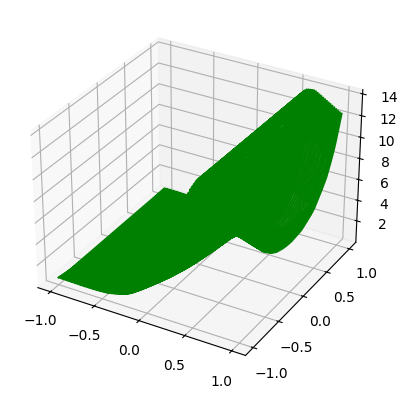

In [11]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
X = torch.linspace(-1, 1, 100).unsqueeze(1).repeat(1, 100).reshape(-1)
Y = torch.linspace(-1, 1, 100).unsqueeze(0).repeat(100, 1).reshape(-1)

batch = torch.stack([X, Y], dim = 1)

y_pred = test_func(batch)

print(batch.shape)

Z = mlp(batch).detach().squeeze()

print(X.shape, Y.shape, Z.shape)

X, Y, Z, y_pred = X.numpy(), Y.numpy(), Z.numpy(), y_pred.numpy()

ax = plt.axes(projection="3d")
ax.plot3D(X, Y, Z, 'green')
plt.show()

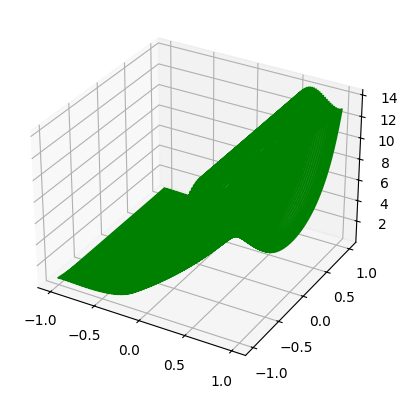

In [12]:
ax = plt.axes(projection="3d")
ax.plot3D(X, Y, y_pred, 'green')
plt.show()